In [1]:
import graphlab
import os
sf = graphlab.SFrame.read_csv('http://www.vivekpatani.tk/resources/reuters.csv', header=False)

This trial license of GraphLab Create is assigned to vpatani@umail.iu.edu and will expire on May 17, 2016. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.


2016-04-18 19:34:12,852 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.8.5 started. Logging: C:\Users\VIVEKP~1\AppData\Local\Temp\graphlab_server_1461022451.log.0


Downloading http://www.vivekpatani.tk/resources/reuters.csv to C:/Users/VIVEKP~1/AppData/Local/Temp/graphlab-Vivek Patani/13156/1dddff44-cd0b-45ef-aa39-0765b90951bb.csv

Finished parsing file http://www.vivekpatani.tk/resources/reuters.csv

Parsing completed. Parsed 100 lines in 0.063532 secs.

------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file http://www.vivekpatani.tk/resources/reuters.csv

Parsing completed. Parsed 2286 lines in 0.051633 secs.

In [2]:
word_list = graphlab.text_analytics.count_words(sf['X2'])
sf['word_list'] = word_list
sf['tfidf'] = graphlab.text_analytics.tf_idf(sf['word_list'])
docs = sf['word_list'].dict_trim_by_values(2)
docs = docs.dict_trim_by_keys(graphlab.text_analytics.stopwords(), exclude=True)
docs[0]

{'1980': 2L, 'base': 2L, 'february': 2L, 'insee': 2L, 'january': 2L, 'pct': 2L}

In [3]:
train_data, test_data = sf.random_split(0.8)

In [4]:
model1 = graphlab.boosted_trees_classifier.create(train_data,target='X1',features=['tfidf'])
results1 = model1.evaluate(test_data)
predictions1 = model1.predict(test_data)
model1.show(view="Tree", tree_id=0)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

WARNING: Detected extremely low variance for feature(s) 'tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 1759

Number of classes           : 34

Number of feature columns   : 1

Number of unpacked features : 17058

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.613246     | 0.885162          | 1.240659          | 0.693182            | 1.791794            |

| 2         | 1.160526     | 0.898806          | 0.943543          | 0.670455            | 1.600553            |

| 3         | 1.596139     | 0.906765          | 0.746967          | 0.681818            | 1.468785            |

| 4         | 2.050529     | 0.911313          | 0.609085          | 0.681818            | 1.366758            |

| 5         | 2.479328     | 0.913019          | 0.507286          | 0.693182            | 1.299594            |

| 6         | 2.897180     | 0.916998          | 0.424384          | 0.670455            | 1.253875            |

| 10        | 4.646852     | 0.921546          | 0.249526          | 0.670455            | 1.122318            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

Canvas is accessible via web browser at the URL: http://localhost:53429/index.html
Opening Canvas in default web browser.


In [9]:
model2 = graphlab.nearest_neighbor_classifier.create(train_data[:10], target='X1')
results2 = model2.evaluate(test_data)
predictions2 = model2.classify(test_data[:1], max_neighbors=1, radius=None)
evals3 = model3.evaluate(test_data[:5])

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 43           | 439     | 10          | 2.92s        |

| 131          | 1317    | 30          | 5.89s        |

| 263          | 2634    | 60          | 7.73s        |

| 307          | 3073    | 70          | 7.90s        |

| 351          | 3512    | 80          | 9.89s        |

| 395          | 3951    | 90          | 11.60s       |

| 439          | 4390    | 100         | 17.48s       |

| Done         |         | 100         | 17.48s       |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 43           | 439     | 10          | 2.49s        |

| 131          | 1317    | 30          | 5.12s        |

| 263          | 2634    | 60          | 6.94s        |

| 307          | 3073    | 70          | 7.17s        |

| 351          | 3512    | 80          | 9.26s        |

| 395          | 3951    | 90          | 10.96s       |

| 439          | 4390    | 100         | 16.77s       |

| Done         |         | 100         | 16.77s       |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 10          | 3.001ms      |

| Done         |         | 100         | 17.012ms     |

+--------------+---------+-------------+--------------+

In [5]:
model3 = graphlab.decision_tree_classifier.create(train_data, target='X1',
                                           max_depth = 3)
results3 = model3.evaluate(test_data)
predictions3 = model3.predict(test_data)
model3.show(view="Tree", tree_id=0)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

WARNING: Detected extremely low variance for feature(s) 'tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 1738

Number of classes           : 34

Number of feature columns   : 3

Number of unpacked features : 34033

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.714400     | 0.815880          | 1.440795          | 0.798165            | 1.537382            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

Canvas is accessible via web browser at the URL: http://localhost:53429/index.html
Opening Canvas in default web browser.


In [6]:
model4 = graphlab.random_forest_classifier.create(train_data, target='X1',
                                           max_depth = 3)
results4 = model4.evaluate(test_data)
predictions4 = model4.predict(test_data)
model4.show(view="Tree", tree_id=0)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

WARNING: Detected extremely low variance for feature(s) 'tfidf' because all entries are nearly the same.
Proceeding with model training using all features. If the model does not provide results of adequate quality, exclude the above mentioned feature(s) from the input dataset.

Random forest classifier:

--------------------------------------------------------

Number of examples          : 1747

Number of classes           : 34

Number of feature columns   : 3

Number of unpacked features : 34285

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss | Validation-accuracy | Validation-log_loss |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

| 1         | 0.470277     | 0.776760          | 1.070110          | 0.660000            | 1.642119            |

| 2         | 0.919645     | 0.811677          | 0.883863          | 0.720000            | 1.391364            |

| 3         | 1.361772     | 0.817401          | 0.815768          | 0.750000            | 1.346643            |

| 4         | 1.809501     | 0.817401          | 0.792996          | 0.720000            | 1.436506            |

| 5         | 2.251501     | 0.822553          | 0.779349          | 0.710000            | 1.438622            |

| 6         | 2.695871     | 0.820836          | 0.783515          | 0.700000            | 1.422710            |

| 10        | 4.587786     | 0.826560          | 0.763229          | 0.710000            | 1.358632            |

+-----------+--------------+-------------------+-------------------+---------------------+---------------------+

Canvas is updated and available in a tab in the default browser.


In [10]:
from IPython.display import Image

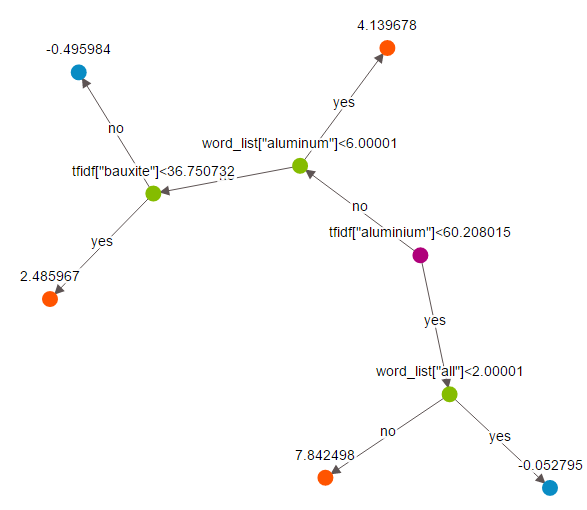

In [20]:
Image(url='http://www.vivekpatani.tk/resources/DecisionTree.PNG',embed=True)


In [21]:
print("Excerpt of the tree fomed using Decision Tree, displaying distance/relevance between words.")

Excerpt of the tree fomed using Decision Tree, displaying distance/relevance between words.


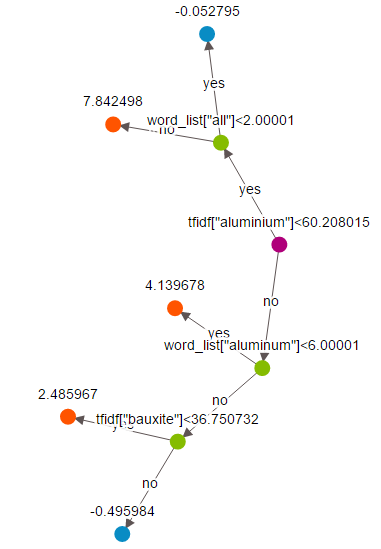

In [22]:
Image(url='http://www.vivekpatani.tk/resources/BoostedTree.PNG',embed=True)

In [23]:
print("Excerpt of the tree fomed using Boosted Tree, displaying distance/relevance between words.")

Excerpt of the tree fomed using Boosted Tree, displaying distance/relevance between words.


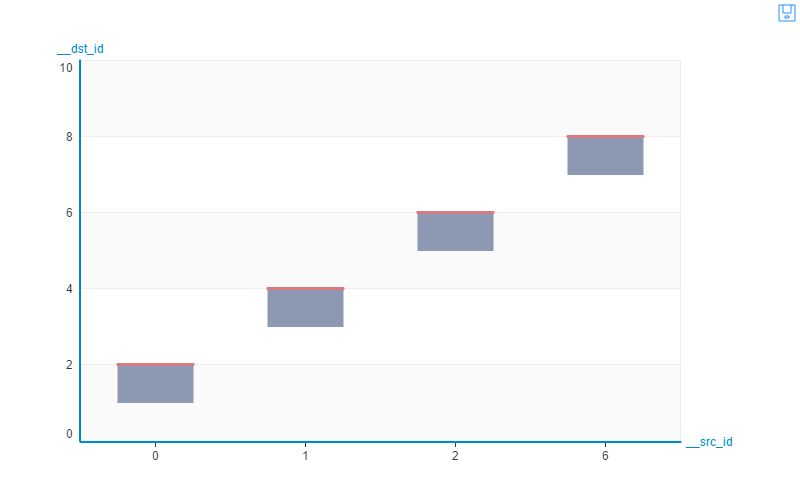

In [24]:
Image(url='http://www.vivekpatani.tk/resources/relation1.png',embed=True)

In [25]:
print("This displays the relevance between various wors, destination and source are the two words and the graph shows how relevant are they")

This displays the relevance between various wors, destination and source are the two words and the graph shows how relevant are they


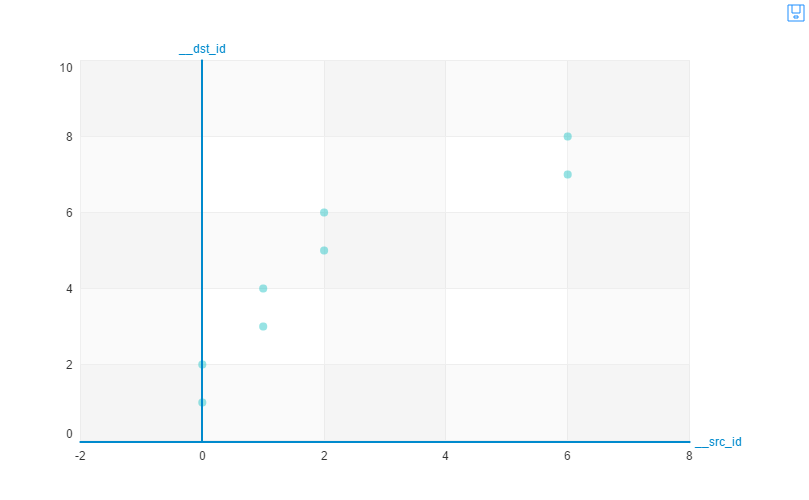

In [26]:
Image(url='http://www.vivekpatani.tk/resources/relation2.png',embed=True)

In [27]:
print("This displays the relevance between various wors, destination and source are the two words and the graph shows how relevant are they")

This displays the relevance between various wors, destination and source are the two words and the graph shows how relevant are they
